In [1]:
import numpy as np
import matplotlib.pyplot as plt
import swiftest
from astroquery.jplhorizons import Horizons

In [2]:
%env HDF5_USE_FILE_LOCKING=FALSE
heliosim = swiftest.Simulation(param_file="param.swiftest.in")
heliosim.ds['varpi'] = heliosim.ds['omega'] + heliosim.ds['capom']
heliosim.ds = heliosim.ds.swap_dims({"id" : "name"})

env: HDF5_USE_FILE_LOCKING=FALSE
Reading Swiftest file param.swiftest.in

Creating Dataset from NetCDF file
Successfully converted 1001 output frames.
Swiftest simulation data stored as xarray DataSet .ds


In [3]:
symbasim = swiftest.Simulation(param_file="../symba_gr_test/param.swiftest.in")
symbasim.ds['varpi'] = symbasim.ds['omega'] + symbasim.ds['capom']
symbasim.ds = symbasim.ds.swap_dims({"id" : "name"})

Reading Swiftest file ../symba_gr_test/param.swiftest.in

Creating Dataset from NetCDF file
Successfully converted 1001 output frames.
Swiftest simulation data stored as xarray DataSet .ds


In [4]:
diff_varpi = symbasim.ds['varpi'] - heliosim.ds['varpi']

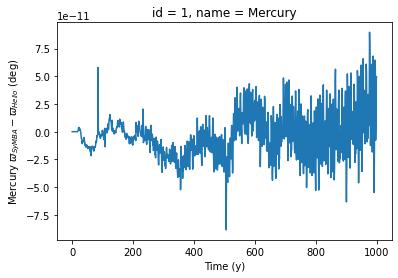

In [5]:
fig, ax = plt.subplots()

diff_varpi.sel(name='Mercury').plot.line(x='time', ax=ax)
ax.set_xlabel('Time (y)')
ax.set_ylabel('Mercury $\\varpi_{SyMBA}-\\varpi_{Helio}$ (deg)');

In [6]:
diff_varpi.sel(name='Mercury')[-1].values[()]

4.9681148084346205e-11